# Lending club case study



## Project Brief
You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA.

Another objective is to **develop a  prediction model** for the same. If some data is provided, then whether the person will be able to repay the loan or not.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import libraries

import pandas as pd
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [ ]:
#read data
data = pd.read_csv('/content/Group Project/loan.csv')

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
data.shape

(39717, 111)

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning


In [ ]:
missingDataInPercentage = data.isnull().sum() * 100 / len(data)
MissingValuesDF = pd.DataFrame({'column_name': data.columns,
                                 'missingDataInPercentage': missingDataInPercentage.round(2)})
MissingValuesDF.sort_values('missingDataInPercentage', inplace=True)
(MissingValuesDF['missingDataInPercentage'] == 100.00).sum()

54

In [ ]:
# Remove columns having only NULL values
ColumnsWithMissingValues = MissingValuesDF[(MissingValuesDF['missingDataInPercentage'] == 100.00)].column_name.tolist()

In [ ]:
data = data.drop(ColumnsWithMissingValues, axis=1)

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [ ]:
#drop irrelevant columns

data = data.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d','mths_since_last_record', 'mths_since_last_delinq'], axis=1)

In [ ]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [ ]:
## Deleting irrelevant colums
# All values are same : no significance for data analysis

data = data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [ ]:
## Delete 'emp_title' : no use for business analysis
data = data.drop(['emp_title'], axis=1)

In [ ]:
## Check percentage of missing data for each column
((data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)).head(11)

emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
total_pymnt            0.00
pub_rec                0.00
revol_bal              0.00
total_acc              0.00
out_prncp              0.00
dtype: float64

In [ ]:
#since missing value percentage is quite low, we can leave columns as it is
data.shape

(39717, 40)

## Identify Categorical columns

In [ ]:
#Count of no of unique values in the column

UniqueData = []
for row in data.columns.tolist():
    UniqueData.append({'column': row, 'count': len(data[row].unique())})

In [ ]:
unique = pd.DataFrame(UniqueData).sort_values('count')

In [ ]:
unique.head(20)

,column,count
3,term,2
13,loan_status,3
11,verification_status,3
39,pub_rec_bankruptcies,4
23,pub_rec,5
9,home_ownership,5
6,grade,7
21,inq_last_6mths,9
19,delinq_2yrs,11
8,emp_length,12



## Creating Derived Columns

In [ ]:
# term column can be converted to numerical column
#change to dtype int
data['term_months'] = data['term'].str.rstrip('months')
del data['term']

In [ ]:
# int_rate column can be converted to numerical column
data['int_rate_percentage'] = data['int_rate'].str.rstrip('%')
del data['int_rate']

In [ ]:
# emp_length column can be converted to numerical column
data['emp_length_years'] = data['emp_length'].str.rstrip('years ')
data['emp_length_years'].replace({'10+': '10'}, inplace=True)
data['emp_length_years'][data['emp_length_years'] == '< 1'] = '0.5'
del data['emp_length']

In [ ]:
# revol_util column can be converted to numerical column
data['revol_util_percentage'] = data['revol_util'].str.rstrip('%')
del data['revol_util']

In [ ]:
# term column can be converted to numerical column
data['issue_d_month'] = data['issue_d'].str.split('-').str[0]
data['issue_d_year'] = data['issue_d'].str.split('-').str[1]

data['last_credit_pull_d_month'] = data['last_credit_pull_d'].str.split('-').str[0]
data['last_credit_pull_d_year'] = data['last_credit_pull_d'].str.split('-').str[1]

data['last_pymnt_d_month'] = data['last_pymnt_d'].str.split('-').str[0]
data['last_pymnt_d_year'] = data['last_pymnt_d'].str.split('-').str[1]

data['earliest_cr_line_month'] = data['earliest_cr_line'].str.split('-').str[0]
data['earliest_cr_line_year'] = data['earliest_cr_line'].str.split('-').str[1]

In [ ]:
# bring issue_d_year to proper format
data['issue_d_year'] = '20' + data['issue_d_year']

In [ ]:
#change specific columns types to float for numerical analysis
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti',
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage',
          'revol_util_percentage'] # Removed the duplicate 'emp_length_years'
data[columns] = data[columns].astype(float) # Use float instead of np.float

In [ ]:
# Create Profit/loss columns
data['ProfitORLoss']=(data['total_pymnt']-data['funded_amnt'])*100/data['funded_amnt']

In [ ]:

data['loan_inc_ratio'] = data.funded_amnt*100/data.annual_inc

In [ ]:
columns = ['total_acc', 'term_months', 'issue_d_year']
data[columns] = data[columns].astype(int)

In [ ]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state',
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
data[columns] = data[columns].apply(lambda x: x.astype('category'))

In [ ]:
data['annual_inc_lakhs'] = data['annual_inc'] / 1000

In [ ]:
data['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [ ]:

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,ProfitORLoss,loan_inc_ratio,annual_inc_lakhs
0,"5,000.00","5,000.00","4,975.00",162.87,B,B2,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,"13,648.00",9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,36,10.65,10.00,83.70,Dec,2011,May,16,Jan,15,Jan,85,17.26,20.83,24.00
1,"2,500.00","2,500.00","2,500.00",59.83,C,C4,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,"1,687.00",4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,60,15.27,0.50,9.40,Dec,2011,Sep,13,Apr,13,Apr,99,-59.65,8.33,30.00
2,"2,400.00","2,400.00","2,400.00",84.33,C,C5,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,"2,956.00",10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,36,15.96,10.00,98.50,Dec,2011,May,16,Jun,14,Nov,01,25.24,19.59,12.25
3,"10,000.00","10,000.00","10,000.00",339.31,C,C1,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,"5,598.00",37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,36,13.49,10.00,21.00,Dec,2011,Apr,16,Jan,15,Feb,96,22.32,20.33,49.20
4,"3,000.00","3,000.00","3,000.00",67.79,B,B5,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,"27,783.00",38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,60,12.69,1.00,53.90,Dec,2011,May,16,May,16,Jan,96,17.11,3.75,80.00


## Count of Categorical and Numerical columns

In [ ]:
numeric_data = data.select_dtypes(include = [np.number])

categorical_data = data.select_dtypes(exclude = [np.number, object]) # Use object instead of np.object

string_data = data.select_dtypes(include = [object]) # Use object instead of np.object

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 26 numerical , 12 categorical and 13 string features in the training data


In [ ]:
## Removing current loan status as it's not needed in the analysis
data = data[data.loan_status !='Current']
data = data.loc[:,data.nunique()!=1]

## Univariate Analysis

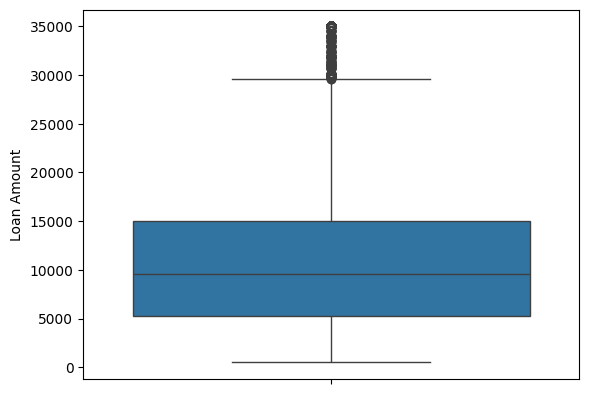

In [ ]:
sns.boxplot( y=data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()






### Inference 1: The loan amount varies from 0 to 35,000 having mean of 10,000

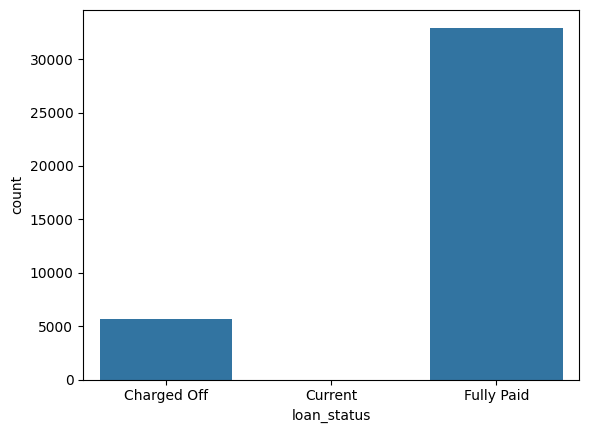

In [ ]:

sns.countplot(x= data["loan_status"])
plt.show()

In [ ]:
data["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current            0
Name: count, dtype: int64

###  Inference 2: Most of the loans are Fully Paid. 5627 loan are having status as defaulters.


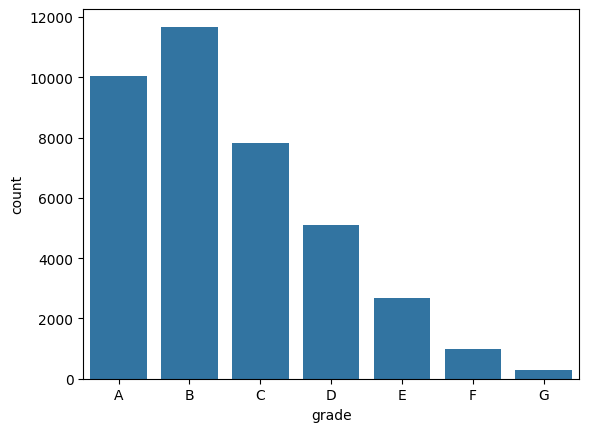

In [ ]:
sns.countplot(x='grade', data=data)
plt.show()

### Inference 3: Most of the loans have grade of A and B. Therefore  most of the loans are high graded loans

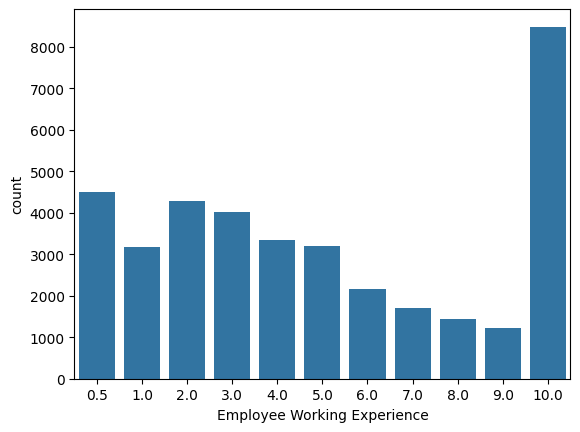

In [ ]:

sns.countplot(x='emp_length_years', data=data)
plt.xlabel('Employee Working Experience')
plt.show()


### Inference 4: Majority of employees applying for the loan have> 10 years of experience

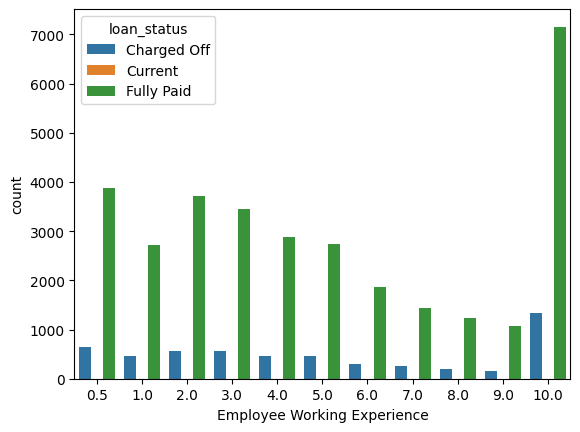

In [ ]:
sns.countplot(x='emp_length_years', hue='loan_status', data=data)
plt.xlabel('Employee Working Experience')
plt.show()

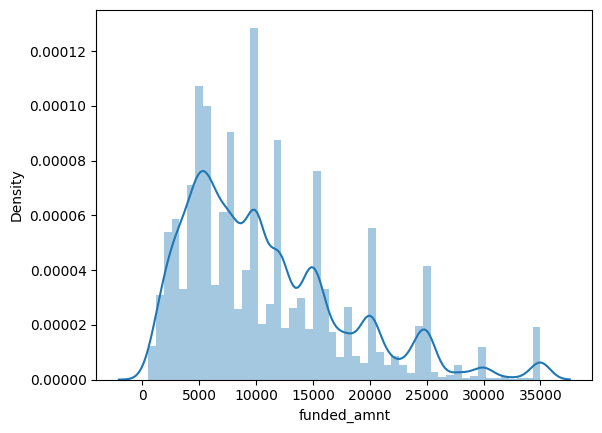

In [ ]:
sns.distplot(data['funded_amnt'])
plt.show()

### Inference 5: Funded amount is left skewed which implies larger loan amounts are offered less.Most of the loan amount given is 5 lakhs

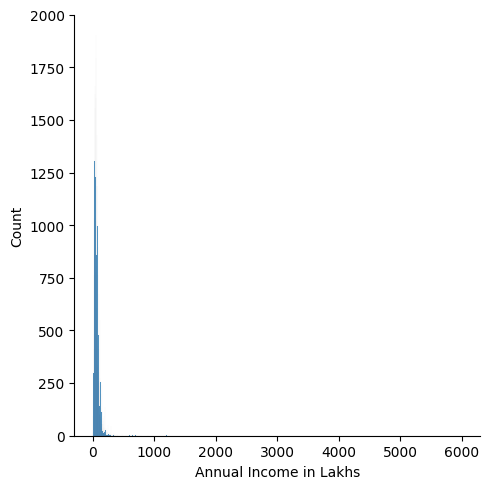

In [ ]:
sns.displot(data['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

In [ ]:
data[data['annual_inc_lakhs']>3000]

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,ProfitORLoss,loan_inc_ratio,annual_inc_lakhs
29639,"25,000.00","15,500.00","11,430.00",334.08,B,B3,MORTGAGE,"3,900,000.00",Not Verified,Jun-10,Fully Paid,home_improvement,Home improvement loan,882xx,NM,0.20,0,Sep-99,3,12,0,"3,270.00",32,"20,044.62","13,756.41","15,500.00","4,544.62",0.00,0.00,0.00,Jun-15,353.14,Jun-15,0.00,60,10.62,3.00,10.20,Jun,2010,Jun,15,Jun,15,Sep,99,29.32,0.40,"3,900.00"
30107,"5,000.00","5,000.00","5,000.00",167.84,C,C1,MORTGAGE,"6,000,000.00",Source Verified,May-10,Fully Paid,home_improvement,home improvment,939xx,CA,0.01,0,Jan-01,1,2,0,"1,434.00",10,"5,514.49","5,514.49","5,000.00",514.49,0.00,0.00,0.00,Apr-11,"3,845.25",May-11,0.00,36,12.73,10.00,37.70,May,2010,May,11,Apr,11,Jan,01,10.29,0.08,"6,000.00"


### Inference 5: There are only 2 applicants having annual income of more than 30 lakhs

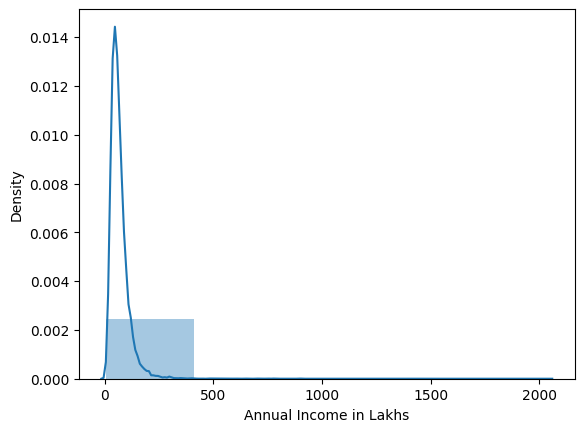

In [ ]:
sns.distplot(data[data['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

### Inference 6: Majority of loan applicants have income less than 5 lakhs

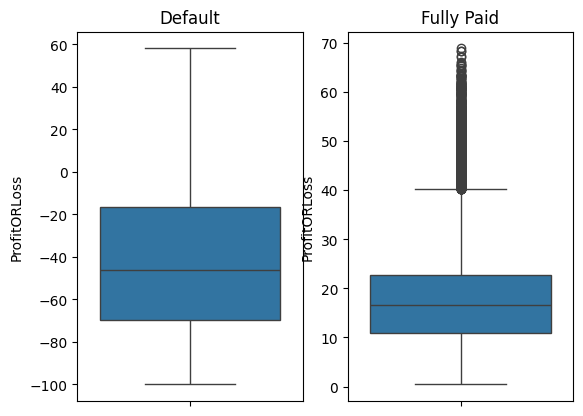

In [ ]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=data[data.loan_status=='Charged Off'].ProfitORLoss)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=data[data.loan_status=='Fully Paid'].ProfitORLoss)
plt.show()

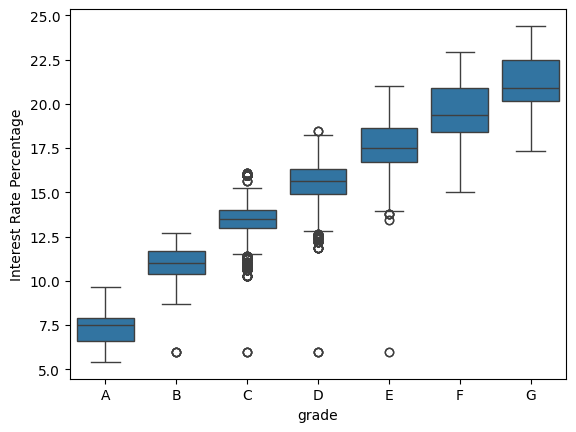

In [ ]:
sns.boxplot(y='int_rate_percentage', x='grade', data=data)
plt.ylabel('Interest Rate Percentage')
plt.show()

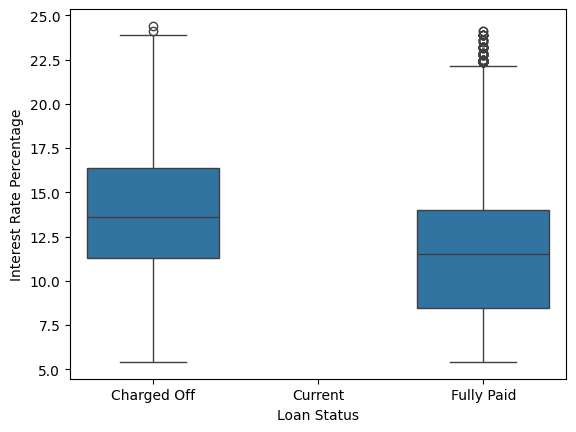

In [ ]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=data)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()
#plot histograms for charged off and fully paid

### Segmented Univariate Analysis

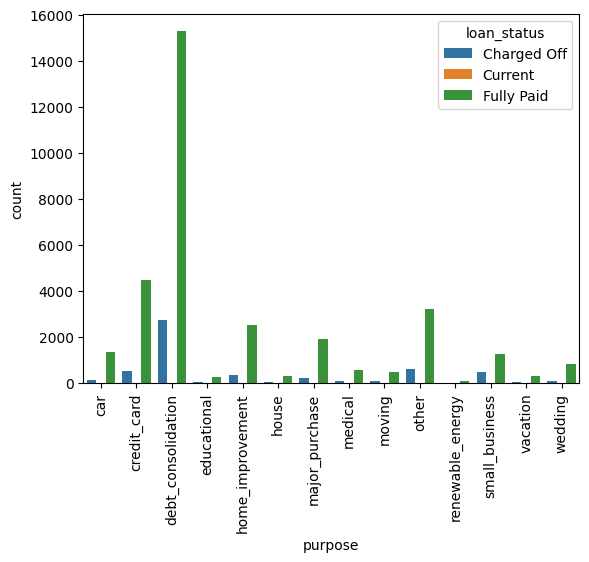

In [ ]:
sns.countplot(x='purpose', hue="loan_status", data=data)
plt.xticks(rotation=90)
plt.show()

### Inference 7: Majority of loan has been given for the debt consolidation purpose and has been fully paid.

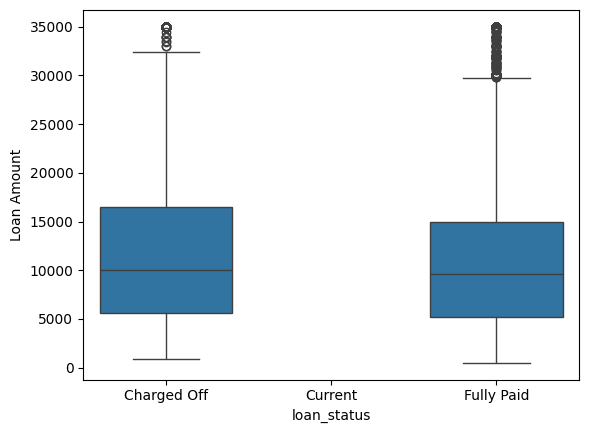

In [ ]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=data)
plt.ylabel('Loan Amount')
plt.show()


### Inference 8: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

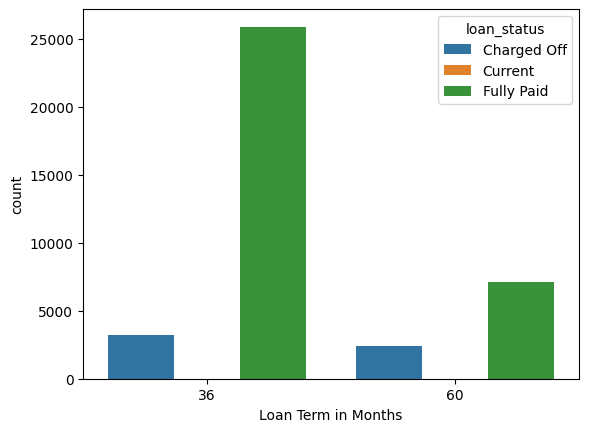

In [ ]:
sns.countplot( x="term_months", hue='loan_status', data=data)
plt.xlabel('Loan Term in Months')
plt.show()

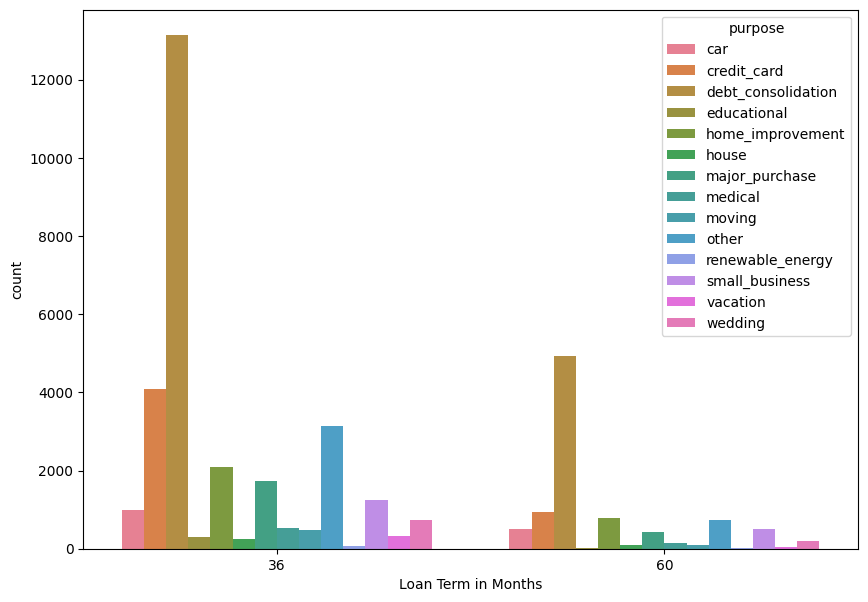

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=data)
plt.xlabel('Loan Term in Months')
plt.show()

### Inference 9: Tenure of 36 months have have high chances to be defaulters

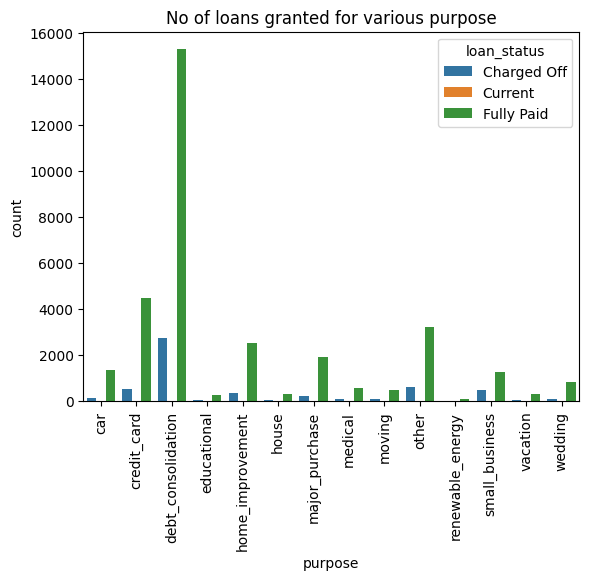

In [ ]:
sns.countplot(x='purpose', hue='loan_status', data=data)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

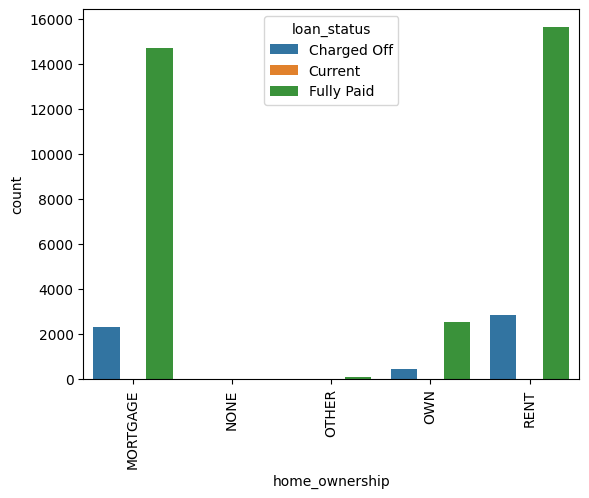

In [ ]:
sns.countplot(x='home_ownership',hue='loan_status', data=data)
plt.xticks(rotation=90)
plt.show()










## Bivariate Analysis

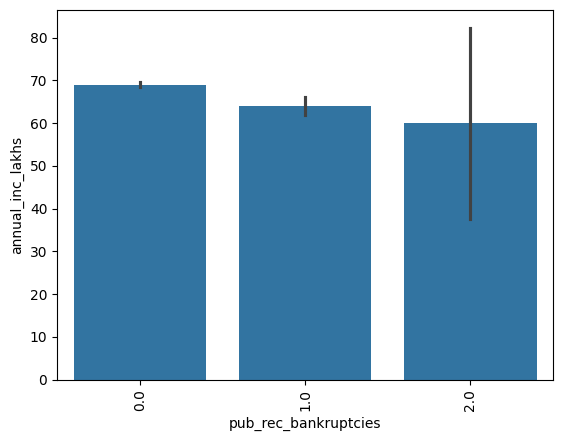

In [ ]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=data)
plt.xticks(rotation=90)
plt.show()

#because pubrecbankruptcies is numeric it should be categorical

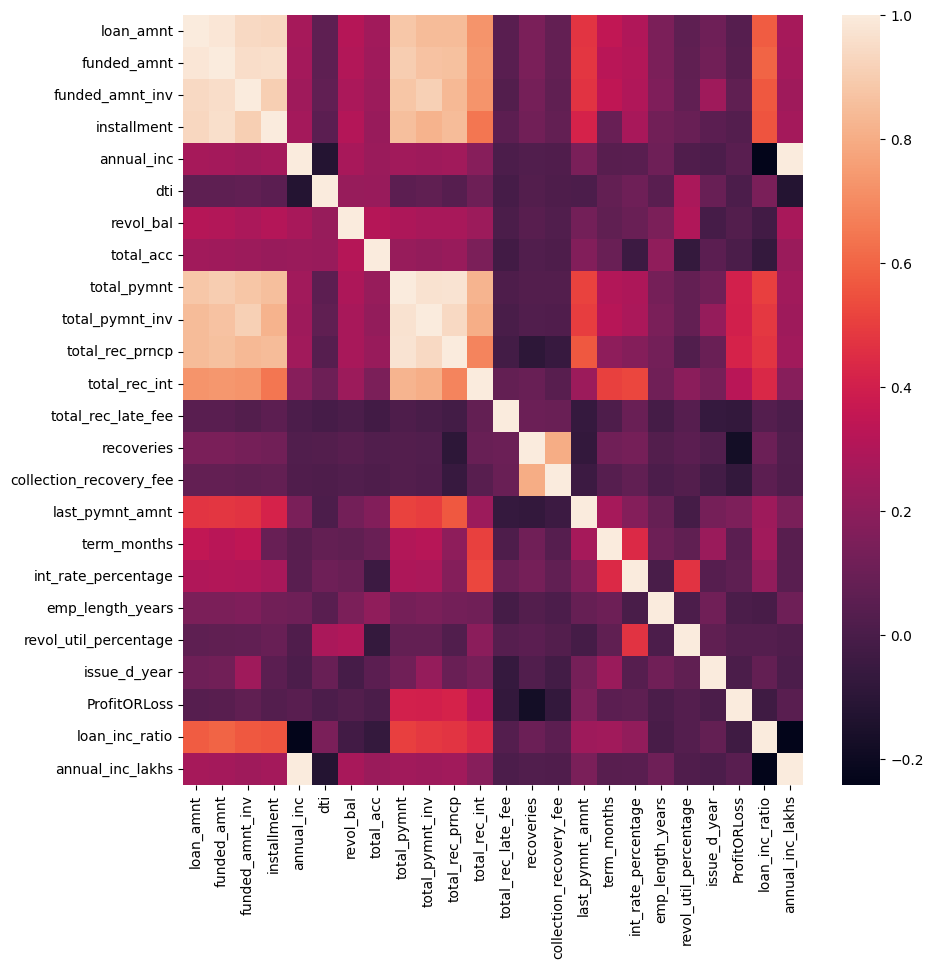

In [ ]:
# Convert relevant columns to numerical type before calculating correlation
data_numeric = data.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
sns.heatmap(data_numeric.corr())
plt.show()

In [ ]:
data['annual_inc_lakhs'].describe()

count   38,577.00
mean        68.78
std         64.22
min          4.00
25%         40.00
50%         58.87
75%         82.00
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [ ]:
del numeric_data['out_prncp']
del numeric_data['out_prncp_inv']

In [ ]:
data['issue_d_year']

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_d_year, Length: 38577, dtype: int64

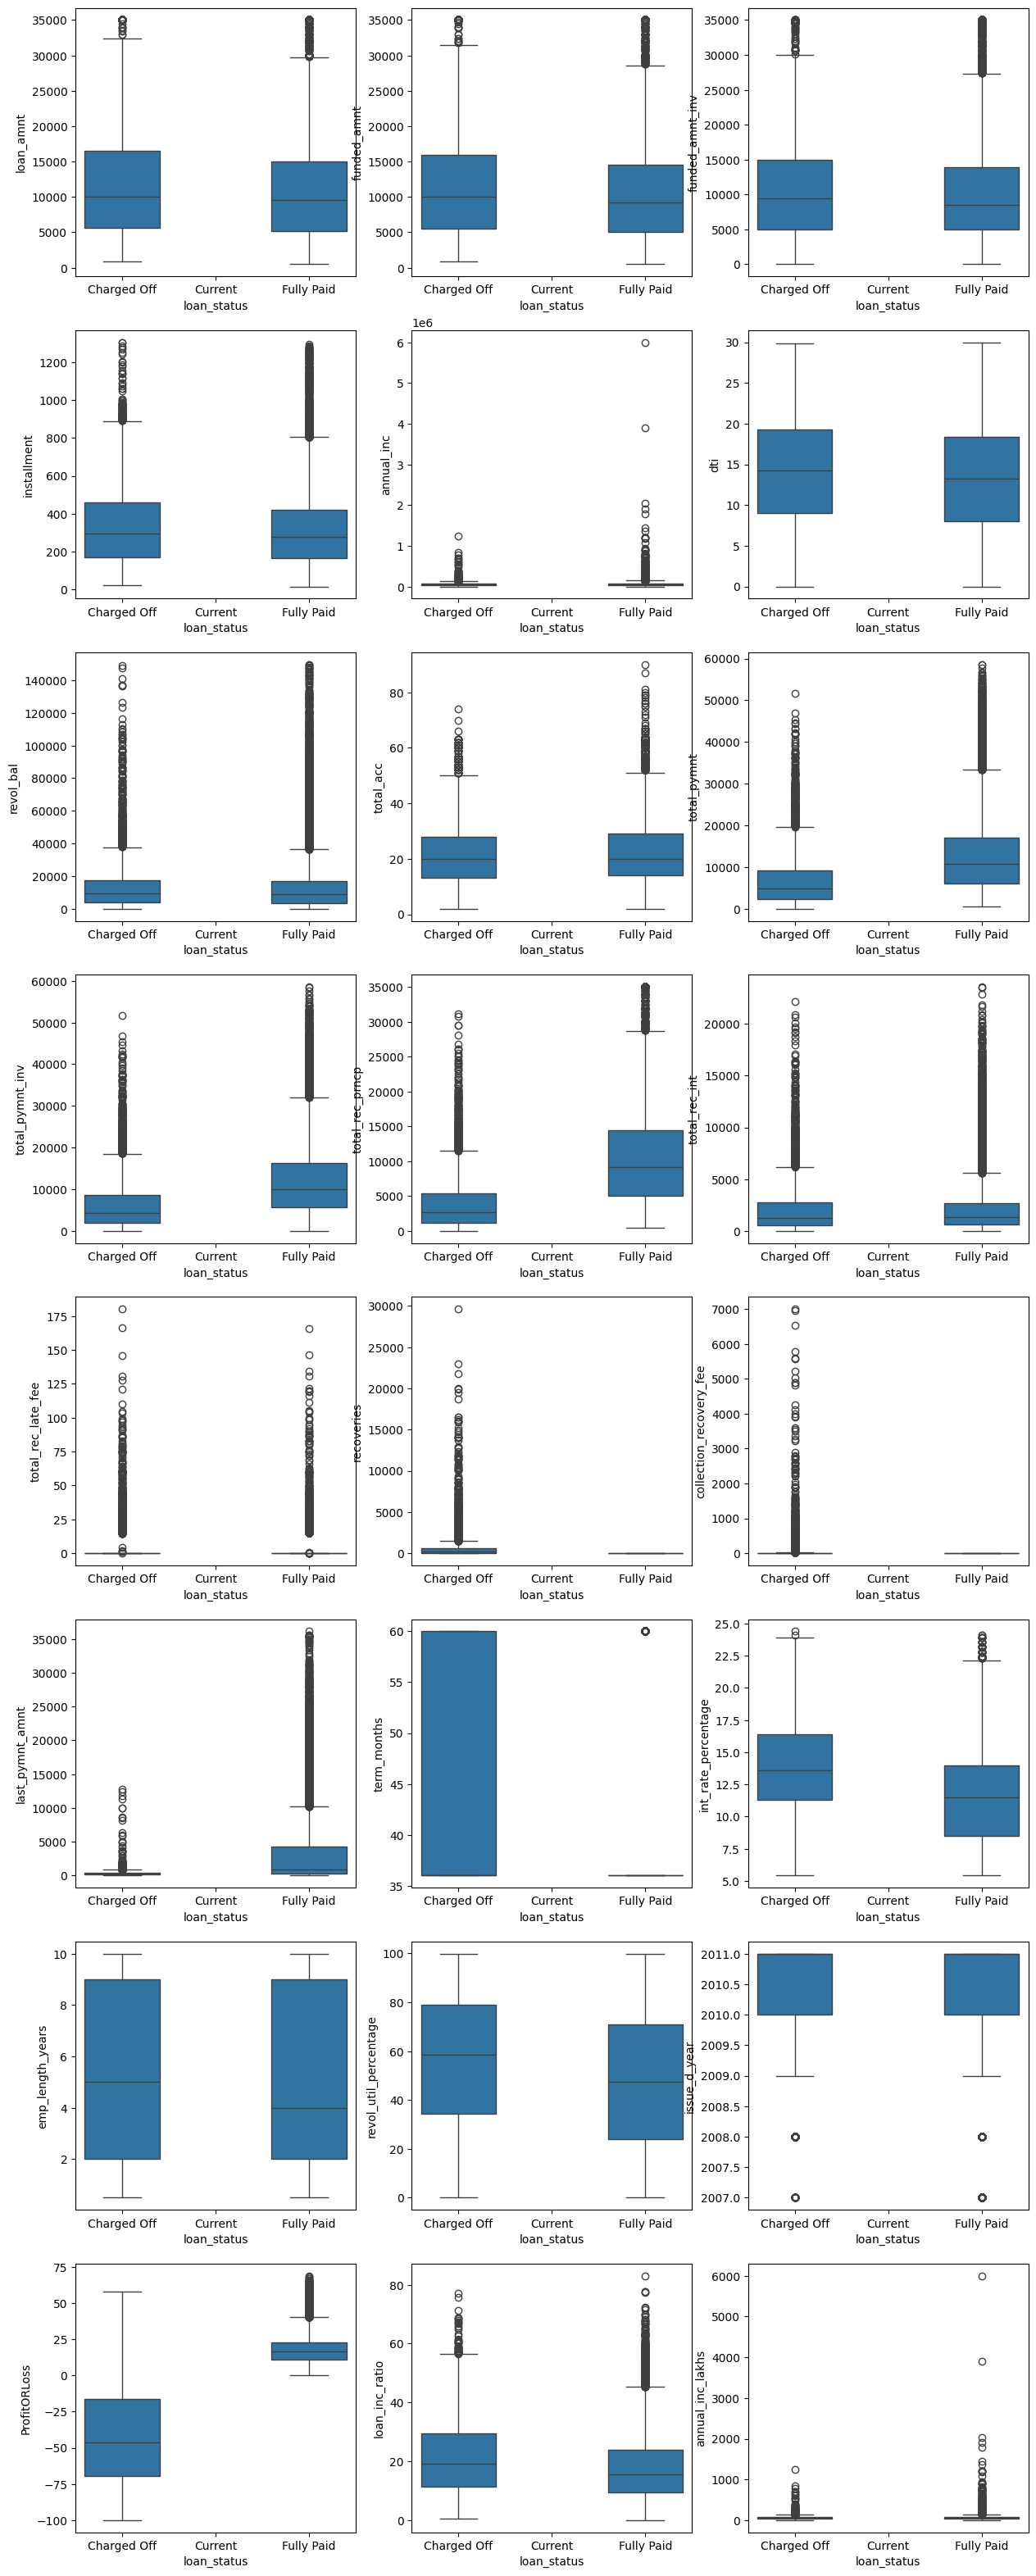

In [ ]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=data)

plt.show()

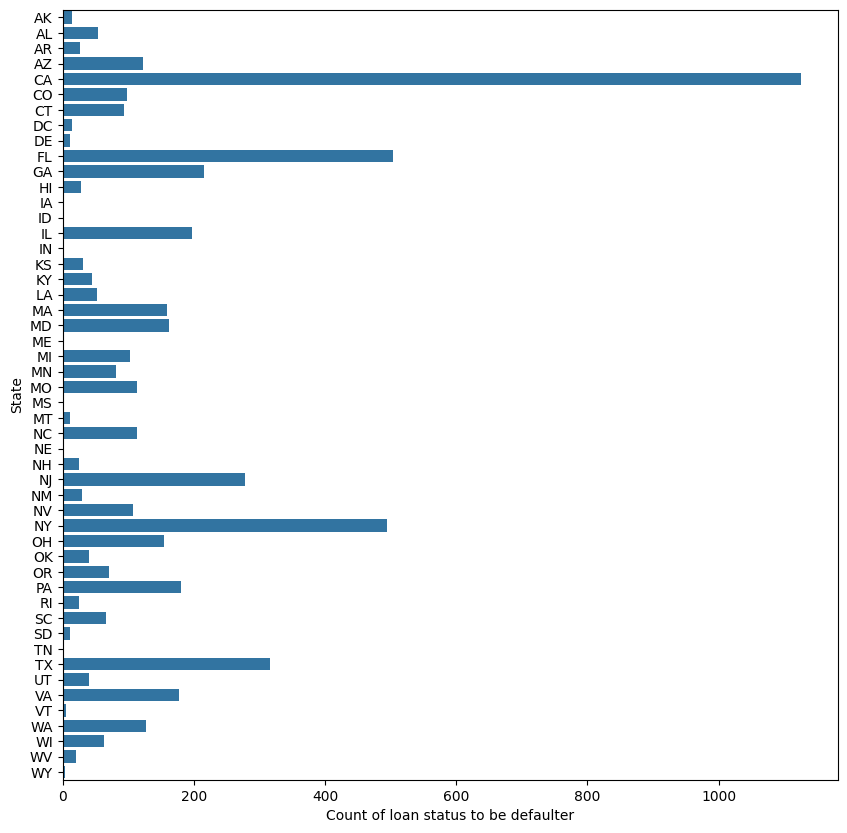

In [ ]:
g = data[data['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

### Inference 10: Applicants from the state CA are having high probability to be default

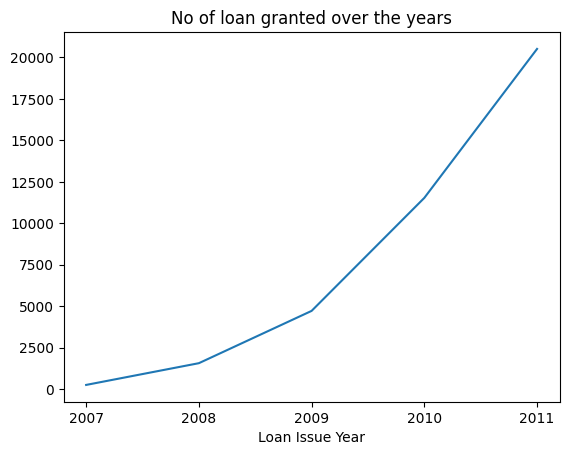

In [ ]:
g = data.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

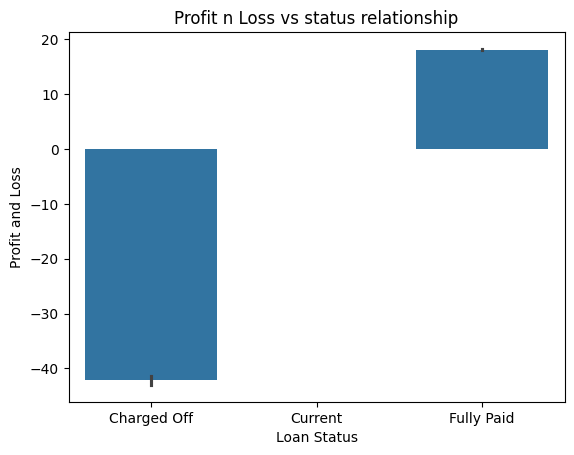

In [ ]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='ProfitORLoss',data=data)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

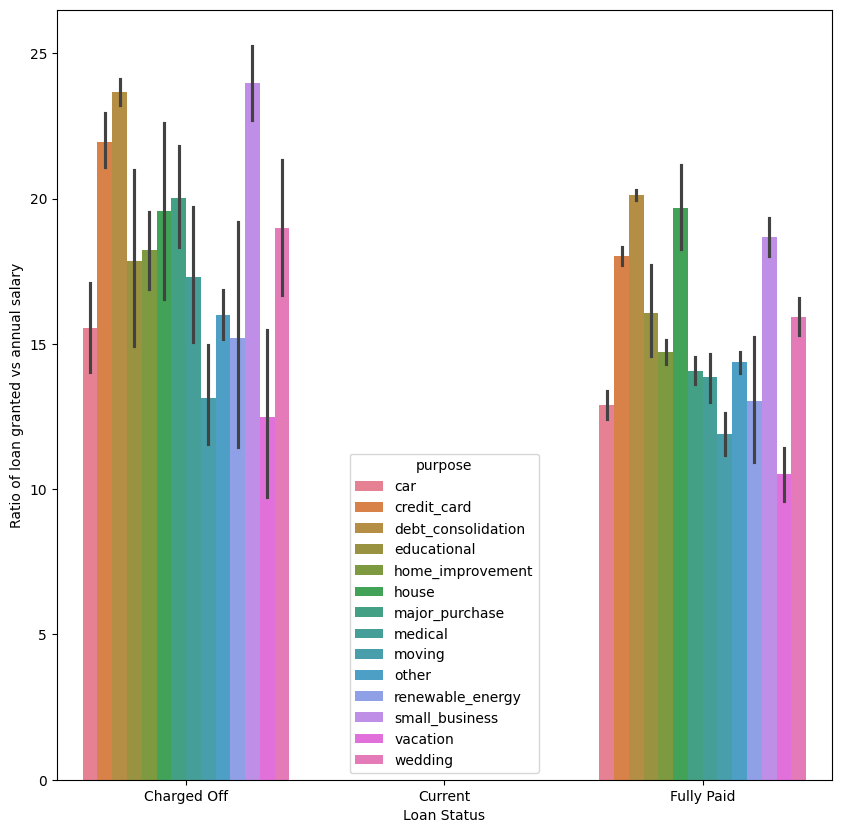

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=data)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [ ]:
df_agg = data[data['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

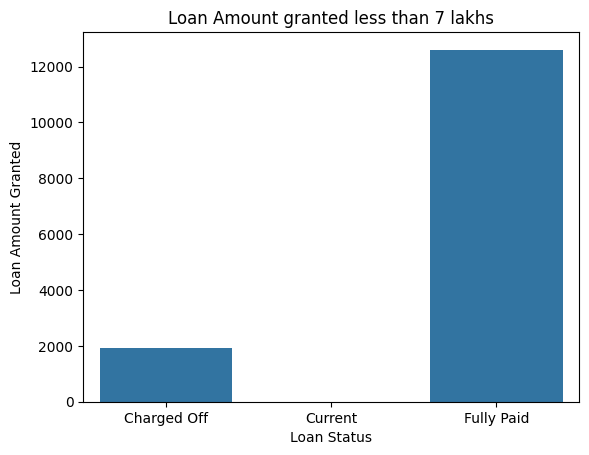

In [ ]:

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [ ]:
df_agg = data[data['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

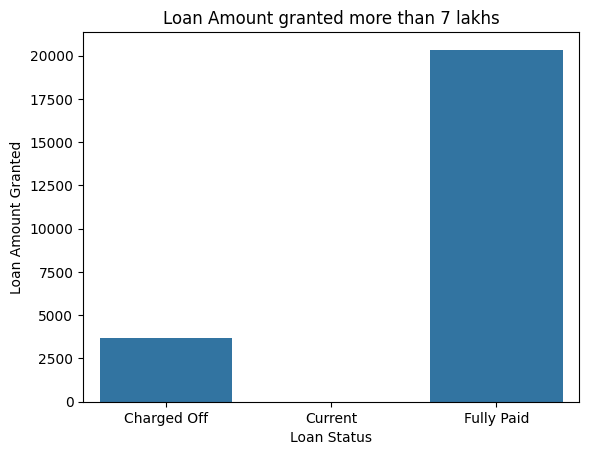

In [ ]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()